# Python

## 1 FizzBuzz

In [149]:
for i in range(1,101):
    s = ''
    if i%3 == 0:
        s='Fizz'
    if i%5 == 0:
        s+='Buzz'
    if not s:
        s = i
    print(s)

1
2
Fizz
4
Buzz
Fizz
7
8
Fizz
Buzz
11
Fizz
13
14
FizzBuzz
16
17
Fizz
19
Buzz
Fizz
22
23
Fizz
Buzz
26
Fizz
28
29
FizzBuzz
31
32
Fizz
34
Buzz
Fizz
37
38
Fizz
Buzz
41
Fizz
43
44
FizzBuzz
46
47
Fizz
49
Buzz
Fizz
52
53
Fizz
Buzz
56
Fizz
58
59
FizzBuzz
61
62
Fizz
64
Buzz
Fizz
67
68
Fizz
Buzz
71
Fizz
73
74
FizzBuzz
76
77
Fizz
79
Buzz
Fizz
82
83
Fizz
Buzz
86
Fizz
88
89
FizzBuzz
91
92
Fizz
94
Buzz
Fizz
97
98
Fizz
Buzz


# 2 Фиббоначи 100

In [150]:
def fib(n):
    a = 0
    b = 1
    for __ in range(n):
        a, b = b, a + b
    return a

print(fib(100))

354224848179261915075


## 3 Функция сортировки

In [151]:
def qsort(array, start=0, stop=None):
    if stop is None:
        stop = len(array)-1
    if stop > start:
        pivot = array[start]
        left = start
        right = stop
        while left <= right:
            while array[left] < pivot:
                left += 1
            while array[right] > pivot:
                right -= 1
            if left <= right: 
                array[left], array[right] = array[right], array[left]
                left += 1
                right -= 1
        qsort(array, start, right)
        qsort(array, left, stop)
        
array = [1,4,5,6,8,54,3,2,4,56,76,-2,5,34,-3,56]
qsort(array)
print(array)

[-3, -2, 1, 2, 3, 4, 4, 5, 5, 6, 8, 34, 54, 56, 56, 76]


## 4 Сортировка в одну линию

In [152]:
def qsort_one_line(a):
    return qsort_one_line([x for x in a[1:] if x < a[0]])+[a[0]]+qsort_one_line([x for x in a[1:] if x >= a[0]]) if len(a)>1 else a
array = [1,4,5,6,8,54,3,2,4,56,76,-2,5,34,-3,56]
array = qsort_one_line(array)
print(array)

[-3, -2, 1, 2, 3, 4, 4, 5, 5, 6, 8, 34, 54, 56, 56, 76]


# NumPy

# 1 Свой аналог numpy.linspace

In [153]:
import numpy as np
from timeit import timeit

start, stop, num = 0, 10, 50000

In [154]:
%timeit L1 = list(np.linspace(start, stop , num=num))

100 loops, best of 3: 2 ms per loop


In [155]:
%%timeit 
L2 = []
for i in range(num):
    L2.append(start+(stop-start)/(num-1)*i)

100 loops, best of 3: 17.4 ms per loop


In [156]:
%timeit L3 = [start+(stop-start)/(num-1)*i for i in range(num)]

100 loops, best of 3: 14.5 ms per loop


## 2 Сравнение ndarray и list 

Создадим матрицу

In [169]:
%timeit np.zeros([5000, 5000])
%timeit [[0.0]*5000]*5000

The slowest run took 17.76 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 3.64 µs per loop
10000 loops, best of 3: 46.2 µs per loop


In [170]:
L4 = np.zeros([5000, 5000])
L5 = [[0.0]*5000]*5000

Возьмем подматрицу

In [171]:
%timeit L4[2:500, 2:500]
%timeit [i for i in [row[2:500] for row in L5[2:500]]]

The slowest run took 18.26 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 316 ns per loop
1000 loops, best of 3: 1.2 ms per loop


Слияние матриц

In [172]:
%timeit np.concatenate((L4, L4), axis=0)
%timeit L5+L5

1 loops, best of 3: 161 ms per loop
10000 loops, best of 3: 45.8 µs per loop


In [173]:
%timeit np.concatenate((L4, L4), axis=1)
%timeit [row1 + row2 for row1, row2 in zip(L5, L5)]

10 loops, best of 3: 169 ms per loop
1 loops, best of 3: 388 ms per loop


# Matplotlib

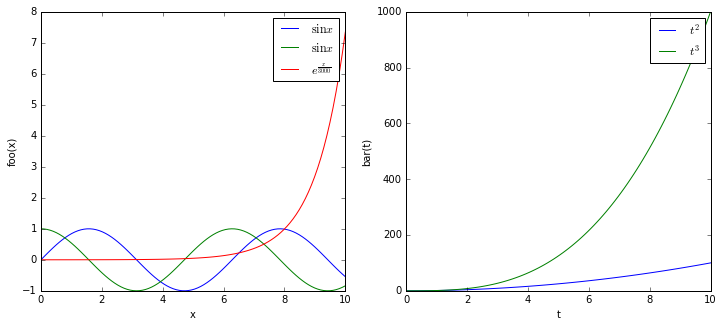

In [220]:
%matplotlib inline
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 100)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

axes[0].plot(x, np.sin(x), label='$\sin x$')
axes[0].plot(x, np.cos(x), label='$\sin x$')
axes[0].plot(x, np.exp(x)/3000, label=r'$e^{\frac{x}{3000}}$')
axes[0].set_xlabel('x')
axes[0].set_ylabel('foo(x)')
axes[0].legend()

axes[1].plot(x, x**2, label='$t^2$')
axes[1].plot(x, x**3, label='$t^3$')
axes[1].set_xlabel('t')
axes[1].set_ylabel('bar(t)')
axes[1].legend()
plt.savefig('foobar.png')
plt.show(fig)

# SciPy

In [278]:
M = np.random.randn(5, 5)
from scipy import linalg
W, V = linalg.eig(M)
for w, v in zip(W, V.transpose()):
    if (np.isclose(np.dot(M, v), v*w)).all():
        np.set_printoptions(precision=3)
        print('Passed. Собс. знач. {:.3} <==> собс. вект. {}'.format(w, v))
    else:
        print('Error')


Passed. Собс. знач. (-0.759+0.583j) <==> собс. вект. [-0.579+0.j     0.365-0.12j   0.200+0.277j -0.050+0.277j -0.320+0.468j]
Passed. Собс. знач. (-0.759-0.583j) <==> собс. вект. [-0.579-0.j     0.365+0.12j   0.200-0.277j -0.050-0.277j -0.320-0.468j]
Passed. Собс. знач. (0.45+0.852j) <==> собс. вект. [-0.241+0.158j -0.680+0.j    -0.266-0.321j  0.086-0.446j -0.264+0.067j]
Passed. Собс. знач. (0.45-0.852j) <==> собс. вект. [-0.241-0.158j -0.680-0.j    -0.266+0.321j  0.086+0.446j -0.264-0.067j]
Passed. Собс. знач. (0.59+0j) <==> собс. вект. [-0.458+0.j  0.246+0.j -0.738+0.j  0.402+0.j  0.150+0.j]
